### Масштабирование данных [Домашнее задание]

**Примечание:**

> Вы не можете использовать библиотеку **```sklearn```** в этом домашнем задании.

> Пожалуйста, не удаляйте комментарии или строки кода.

1. Пожалуйста, реализуйте функцию ```load_data(filename=None)```, которая будет загружать данные файла csv из ```filename``` и возвращать ```DataFrame```.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def load_data(filename=None):
    #Начало вашего кода
    pd_data = pd.read_csv(filename)
    pd_data.drop("Id", axis = 1, inplace = True)
    return pd_data
    #Конец вашего кода

num_data = load_data(filename="num_house_prices.csv")
num_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1334,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1335,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1336,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


### Ожидаемые результаты:

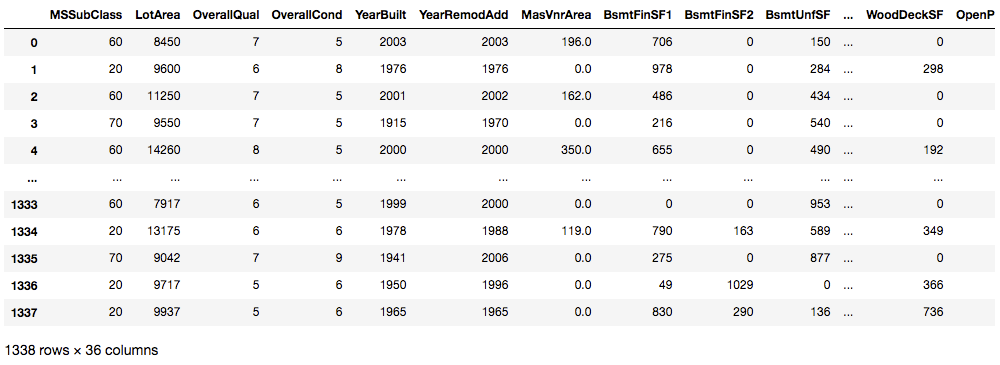

2. Пожалуйста, реализуйте функцию ```split_data(data, ratio=0.1)```, которая разбивает набор данных, загруженный в предыдущем вопросе, на наборы данных ```train``` и ```validation``` в соотношении 9:1.

In [2]:
import numpy as np

def split_data(data, ratio=0.1):
    np.random.seed(1)
    #Начало вашего кода    
    val = ratio
    train = 1 - val
    
    indices = np.arange(0, len(data))
    np.random.shuffle(indices)
    
    val_indices = indices[:round(val * len(data))]
    train_indices = indices[round(val * len(data)):]
    
    val_data = data.iloc[val_indices]
    train_data = data.iloc[train_indices]
    #Конец вашего кода
    return {"validation":val_data, "train":train_data}

splitted_data = split_data(num_data, ratio=0.1)

In [3]:
splitted_data["validation"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,20,7943,4,5,1961,1961,192.0,903,0,126,...,64,0,39,0,0,0,0,4,2007,118500
1087,60,8935,7,5,2002,2002,95.0,0,0,831,...,144,68,0,0,0,0,0,7,2009,195000
1020,20,12085,8,5,2007,2007,328.0,1004,0,730,...,0,0,0,0,0,0,0,11,2007,318000
460,60,9803,7,5,2005,2005,0.0,400,0,466,...,0,108,0,0,0,0,0,2,2008,226700
802,20,8892,5,7,1953,1996,0.0,0,0,105,...,196,0,150,0,0,0,0,10,2008,116000


### Ожидаемые результаты:

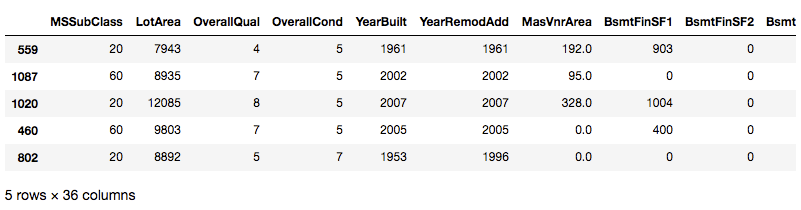

3. Пожалуйста, визуализируйте коэффициенты корреляции для набора данных ```train```.

Примечание: ```figsize=(10,8)```

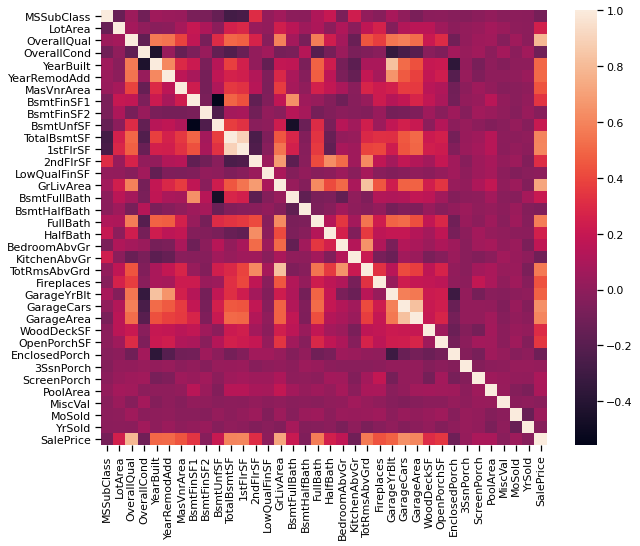

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Начало вашего кода
corr = splitted_data["train"].corr()

plt.figure(figsize=(10,8))
sns.set_context("notebook")
ax = sns.heatmap(corr);
#Конец вашего кода

### Ожидаемые результаты:

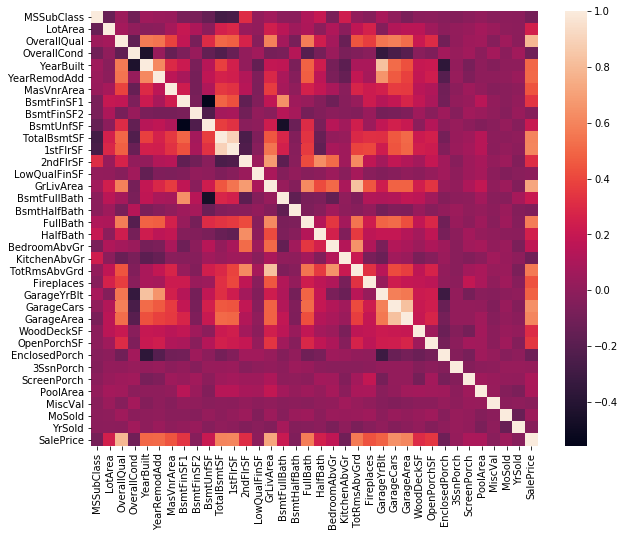

4. Теперь выберите топ 9 наиболее коррелированных параметров с ```"SalePrice"``` и назначьте результаты списку ```important```. Теперь визуализируйте коэффициенты корреляции этих параметров (переменных).

    Примечание: ```figsize=(8,8)```

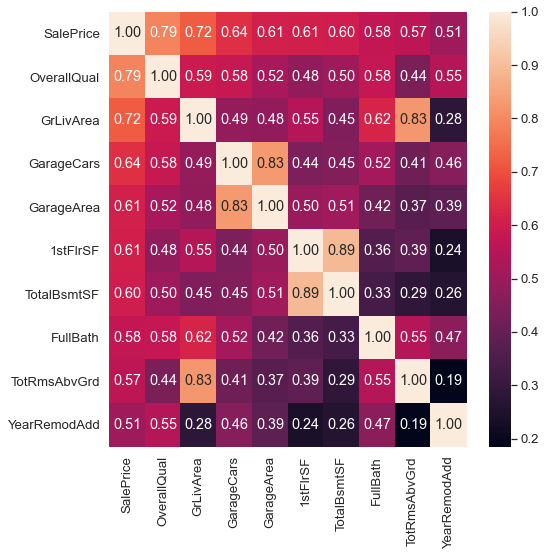

In [5]:
#Начало вашего кода 
corr = splitted_data["train"].corr()
matrix = corr["SalePrice"].abs().sort_values()
important = matrix[-10:].index.tolist()[::-1]

corr = splitted_data["train"][important].corr()

plt.figure(figsize=(8,8))
sns.set(style = "darkgrid")
sns.set_context("notebook")
sns.set(font_scale=1.2)
ax = sns.heatmap(corr, annot = True, fmt = ".2f")
#Конец вашего кода

### Ожидаемые результаты:


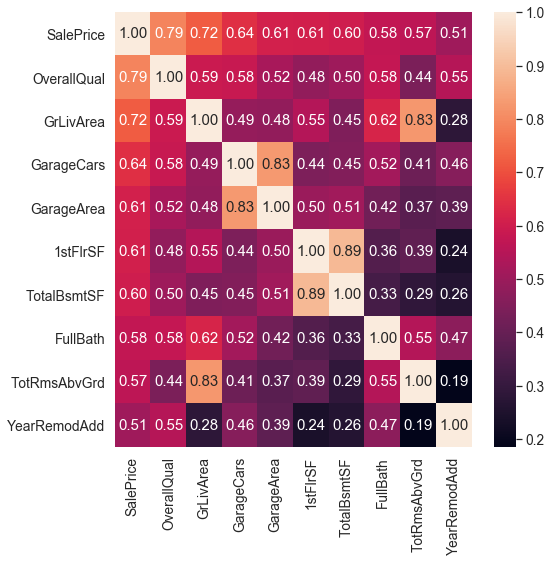

5. Пожалуйста, реализуйте функцию ```standard_scaling_fit(data)```, которая **стандартизирует** данные, и вернет кортеж из стандартизированных данных, среднего значения, стандартного отклонения.

In [6]:
from sklearn.preprocessing import StandardScaler


def standard_scaling_fit(data):
    #Начало вашего кода    
    sc = StandardScaler()
    sc.fit(np.reshape(data.values, (-1,1)))
    transformed = sc.transform(np.reshape(data.values, (-1,1)))
    transformed = transformed.ravel()
    mean = data.mean()
    std = np.std(data)
    
    return transformed, mean, std
    #Конец вашего кода
    
MSSubClass, mean_MSSubClass, std_MSSubClass = standard_scaling_fit(splitted_data["train"]["MSSubClass"])

In [7]:
print(MSSubClass[:5])
print(mean_MSSubClass)
print(std_MSSubClass)

[ 0.09312544 -0.8703378  -0.62947199 -0.8703378  -0.8703378 ]
56.133720930232556
41.516892760580866


### Ожидаемые результаты:

```python
[ 0.09312544 -0.8703378  -0.62947199 -0.8703378  -0.8703378 ]
56.133720930232556
41.51689276058058
```

6. Теперь стандартизируйте все столбцы в наборе обучающих данных ```splitted_data["train"]``` и сохраните среднее значения и стандартное отклонения для каждого столбца.

In [8]:
mean_vals = {}
std_vals = {}
#Начало вашего кода
for col in splitted_data["train"].columns:
    column, mean, std = standard_scaling_fit(splitted_data["train"][col])
    mean_vals[col] = mean
    std_vals[col] = std
    splitted_data["train"][col] = column
#Конец вашего кода
print(mean_vals)
print(std_vals)
splitted_data["train"].head()

{'MSSubClass': 56.133720930232556, 'LotArea': 10726.503322259136, 'OverallQual': 6.229235880398671, 'OverallCond': 5.598837209302325, 'YearBuilt': 1973.421096345515, 'YearRemodAdd': 1985.9800664451827, 'MasVnrArea': 111.8297342192691, 'BsmtFinSF1': 468.94435215946845, 'BsmtFinSF2': 50.521594684385384, 'BsmtUnfSF': 578.1328903654485, 'TotalBsmtSF': 1097.5988372093022, '1stFlrSF': 1176.5548172757476, '2ndFlrSF': 355.6619601328904, 'LowQualFinSF': 3.9966777408637872, 'GrLivArea': 1536.2134551495017, 'BsmtFullBath': 0.4418604651162791, 'BsmtHalfBath': 0.059800664451827246, 'FullBath': 1.573920265780731, 'HalfBath': 0.40282392026578073, 'BedroomAbvGr': 2.854651162790698, 'KitchenAbvGr': 1.0290697674418605, 'TotRmsAbvGrd': 6.545681063122924, 'Fireplaces': 0.6561461794019934, 'GarageYrBlt': 1978.8222591362126, 'GarageCars': 1.8729235880398671, 'GarageArea': 503.6237541528239, 'WoodDeckSF': 101.33471760797342, 'OpenPorchSF': 48.01578073089701, 'EnclosedPorch': 20.73421926910299, '3SsnPorch': 3

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
355,0.093125,0.164198,2.851966,-0.556685,1.140934,1.088726,0.862208,1.775286,-0.298079,-0.397577,...,0.732209,1.349231,-0.341911,-0.118511,-0.2892,-0.075681,-0.08511,0.607747,0.140602,3.066484
1316,-0.870338,-0.218603,-0.173379,3.161753,-0.388063,0.940397,0.673801,-1.026453,-0.298079,1.672328,...,-0.783795,-0.188547,-0.341911,-0.118511,-0.2892,-0.075681,-0.08511,0.235934,0.140602,-0.173669
133,-0.629472,-0.432836,-0.929716,1.302534,-1.441372,0.347085,-0.601988,-0.568981,-0.298079,-0.162823,...,-0.412529,-0.753445,-0.341911,-0.118511,-0.2892,-0.075681,-0.08511,1.723184,0.892977,-1.060854
181,-0.870338,-0.056518,-0.173379,0.372925,0.121603,-0.443999,-0.601988,0.376605,1.348028,-0.681992,...,1.057067,0.548959,-0.341911,-0.118511,-0.2892,-0.075681,-0.08511,-1.623129,0.140602,-0.205813
1133,-0.870338,-0.158749,1.339293,-0.556685,1.106957,0.989840,-0.429729,-0.089621,-0.298079,1.060611,...,0.144371,-0.235622,-0.341911,-0.118511,-0.2892,-0.075681,-0.08511,2.094997,-0.611773,1.007958


### Ожидаемые результаты:

```python
{'MSSubClass': 56.133720930232556, 'LotArea': 10726.503322259136, 'OverallQual': 6.229235880398671, 'OverallCond': 5.598837209302325, 'YearBuilt': 1973.421096345515, 'YearRemodAdd': 1985.9800664451827, 'MasVnrArea': 111.8297342192691, 'BsmtFinSF1': 468.94435215946845, 'BsmtFinSF2': 50.521594684385384, 'BsmtUnfSF': 578.1328903654485, 'TotalBsmtSF': 1097.5988372093022, '1stFlrSF': 1176.5548172757476, '2ndFlrSF': 355.6619601328904, 'LowQualFinSF': 3.9966777408637872, 'GrLivArea': 1536.2134551495017, 'BsmtFullBath': 0.4418604651162791, 'BsmtHalfBath': 0.059800664451827246, 'FullBath': 1.573920265780731, 'HalfBath': 0.40282392026578073, 'BedroomAbvGr': 2.854651162790698, 'KitchenAbvGr': 1.0290697674418605, 'TotRmsAbvGrd': 6.545681063122924, 'Fireplaces': 0.6561461794019934, 'GarageYrBlt': 1978.8222591362126, 'GarageCars': 1.8729235880398671, 'GarageArea': 503.6237541528239, 'WoodDeckSF': 101.33471760797342, 'OpenPorchSF': 48.01578073089701, 'EnclosedPorch': 20.73421926910299, '3SsnPorch': 3.5697674418604652, 'ScreenPorch': 16.89202657807309, 'PoolArea': 3.345514950166113, 'MiscVal': 45.48504983388705, 'MoSold': 6.365448504983389, 'YrSold': 2007.813122923588, 'SalePrice': 187506.9584717608}
{'MSSubClass': 41.51689276058058, 'LotArea': 10642.617729691996, 'OverallQual': 1.3221631378030052, 'OverallCond': 1.075720562066196, 'YearBuilt': 29.43106005240031, 'YearRemodAdd': 20.225422343320414, 'MasVnrArea': 185.76752452738435, 'BsmtFinSF1': 456.8591014718542, 'BsmtFinSF2': 169.49084991457786, 'BsmtUnfSF': 443.01546804994615, 'TotalBsmtSF': 402.27502042563935, '1stFlrSF': 383.57702187784173, '2ndFlrSF': 438.81073177442954, 'LowQualFinSF': 40.007702608777244, 'GrLivArea': 513.1202284930174, 'BsmtFullBath': 0.5162880487681081, 'BsmtHalfBath': 0.23711715455223228, 'FullBath': 0.5425584589241012, 'HalfBath': 0.5021799642600577, 'BedroomAbvGr': 0.7633441645342868, 'KitchenAbvGr': 0.1728752313978001, 'TotRmsAbvGrd': 1.5664907618358757, 'Fireplaces': 0.6429043566924817, 'GarageYrBlt': 24.61062156670623, 'GarageCars': 0.6350486607104864, 'GarageArea': 188.5549845355866, 'WoodDeckSF': 129.28729407527115, 'OpenPorchSF': 63.72833942591902, 'EnclosedPorch': 60.6421680843607, '3SsnPorch': 30.121806147602722, 'ScreenPorch': 58.40948333732727, 'PoolArea': 44.20559661675353, 'MiscVal': 534.4237066986043, 'MoSold': 2.6895272864867725, 'YrSold': 1.3291245144541628, 'SalePrice': 77774.09460974383}
```

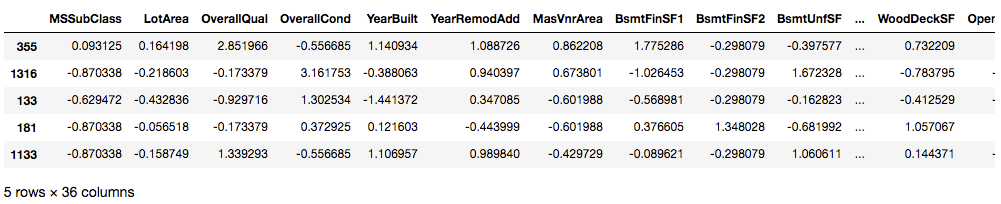

7. Пожалуйста, реализуйте функцию ```scale_validation(data, mean_val, std_val)```, которая будет стандартизировать данные на основе входных аргументов ```mean_val``` и ```std_val```.

In [9]:
def scale_validation(data, mean_val, std_val):
    #Начало вашего кода 
    feature_val = []
    for elem in data:
        xstd = round((elem - mean_val) / std_val,7)
        feature_val.append(xstd)
    return feature_val
    #Конец вашего кода
    
MSSubClass_val = scale_validation(splitted_data["validation"]["MSSubClass"], mean_vals["MSSubClass"], std_vals["MSSubClass"])
print(MSSubClass_val[:5])

[-0.8703378, 0.0931254, -0.8703378, 0.0931254, -0.8703378]


### Ожидаемые результаты:

```python
[-0.8703378   0.09312544 -0.8703378   0.09312544 -0.8703378 ]
```

8. Пожалуйста, стандартизируйте все столбцы в проверочном наборе данных ```splitted_data["validation"]```, используя средние значения и стандартные отклонения, полученные из обучающего набора данных ```splitted_data["train"]```.

In [10]:
#Начало вашего кода
for col in splitted_data["validation"].columns:
    feature_val = scale_validation(splitted_data["validation"][col], mean_vals[col], std_vals[col])
    splitted_data["validation"][col] = feature_val
#Конец вашего кода
splitted_data["validation"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,-0.870338,-0.261543,-1.686052,-0.556685,-0.422040,-1.235083,0.431562,0.950086,-0.298079,-1.020580,...,-0.288773,-0.753445,0.301206,-0.118511,-0.2892,-0.075681,-0.085111,-0.879503,-0.611773,-0.887274
1087,0.093125,-0.168333,0.582957,-0.556685,0.971046,0.792069,-0.090596,-1.026453,-0.298079,0.570786,...,0.330004,0.313584,-0.341911,-0.118511,-0.2892,-0.075681,-0.085111,0.235934,0.892977,0.096344
1020,-0.870338,0.127647,1.339293,-0.556685,1.140934,1.039283,1.163660,1.171161,-0.298079,0.342803,...,-0.783795,-0.753445,-0.341911,-0.118511,-0.2892,-0.075681,-0.085111,1.723184,-0.611773,1.677847
460,0.093125,-0.086774,0.582957,-0.556685,1.072979,0.940397,-0.601988,-0.150909,-0.298079,-0.253113,...,-0.783795,0.941249,-0.341911,-0.118511,-0.2892,-0.075681,-0.085111,-1.623128,0.140602,0.503934
802,-0.870338,-0.172373,-0.929716,1.302534,-0.693862,0.495413,-0.601988,-1.026453,-0.298079,-1.067983,...,0.732209,-0.753445,2.131615,-0.118511,-0.2892,-0.075681,-0.085111,1.351372,0.140602,-0.919419


### Ожидаемые результаты:

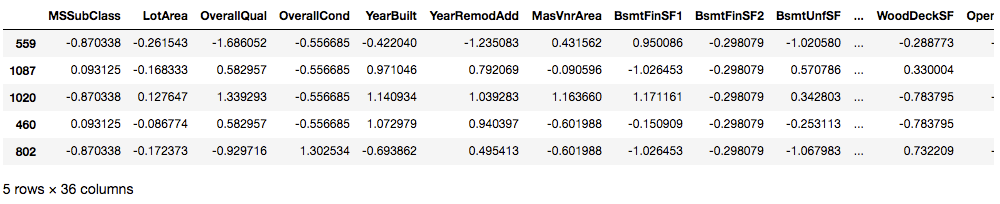

### Отличная работа